In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ms = pd.DataFrame.from_csv('../data/microsoft.csv')
ms['MA10'] = ms['Close'].rolling(10).mean()
ms['MA50'] = ms['Close'].rolling(50).mean()
ms = ms.dropna()
ms.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,42.495,44.0034
2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,42.263,43.9056
2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,42.105,43.8044
2015-03-18,41.430000,42.830002,41.330002,42.500000,39.484009,43971800,42.049,43.7278
2015-03-19,42.259998,42.590000,42.220001,42.290001,39.288918,33879100,41.967,43.6606


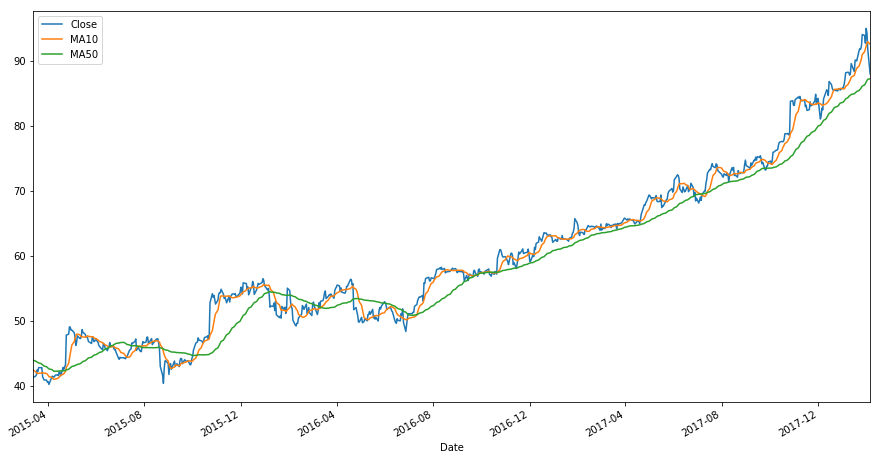

In [10]:
plt.figure(figsize=(15,8))
ms['Close'].plot(legend=True)
ms['MA10'].plot(legend=True)
ms['MA50'].plot(legend=True)
plt.show()

In [15]:
ms['Shares'] = [ 1 if ms.loc[ei,'MA10']>ms.loc[ei,'MA50'] else 0 for ei in ms.index]
ms = ms.dropna()
ms.head()


,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares
Date,,,,,,,,,
2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,42.495,44.0034,0
2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,42.263,43.9056,0
2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,42.105,43.8044,0
2015-03-18,41.430000,42.830002,41.330002,42.500000,39.484009,43971800,42.049,43.7278,0
2015-03-19,42.259998,42.590000,42.220001,42.290001,39.288918,33879100,41.967,43.6606,0


In [18]:
ms['Close1']=ms['Close'].shift(-1)
ms.iloc[500:500,:]
ms.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1
Date,,,,,,,,,,
2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,42.495,44.0034,0,41.560001
2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,42.263,43.9056,0,41.700001
2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,42.105,43.8044,0,42.500000
2015-03-18,41.430000,42.830002,41.330002,42.500000,39.484009,43971800,42.049,43.7278,0,42.290001
2015-03-19,42.259998,42.590000,42.220001,42.290001,39.288918,33879100,41.967,43.6606,0,42.880001


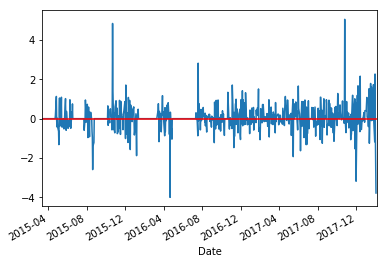

In [30]:
ms['Profit']=[ms.loc[ei, 'Close1']-ms.loc[ei, 'Close'] if ms.loc[ei,'Shares']==1 else 0 for ei in ms.index]
ms['Profit'].plot()
plt.axhline(y=0,color='red')
plt.show()

In [31]:
ms['Wealth'] = ms['Profit'].cumsum()
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,Wealth
Date,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,91.862,86.5244,1,95.010002,2.270004,30.540009
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.349,86.7606,1,94.260002,-0.750000,29.790009
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,92.765,86.9978,1,91.779999,-2.480003,27.310006
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,92.943,87.1828,1,88.000000,-3.779999,23.530007
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,92.582,87.2684,1,NaN,NaN,NaN


In [32]:
print("Total Money Win is ", ms.loc[ms.index[-2],'Wealth'])
print("Total Money Spent is ", ms.loc[ms.index[0],'Close'])

Total Money Win is  23.530007
Total Money Spent is  41.380001


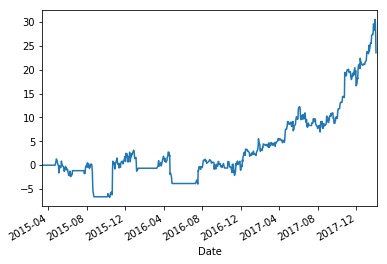

In [33]:
ms['Wealth'].plot()
plt.show()